In [97]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("default")
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


pd.options.mode.chained_assignment = None

### Création du dataset

In [98]:
data = make_moons(n_samples = 10000, noise = 0.4)

x_1 = []
x_2 = []
y_values = data[1].tolist()

for i, j in data[0]:
    x_1.append(i)
    x_2.append(j)

df = pd.DataFrame(list(zip(x_1, x_2, y_values)), columns = ["feature_1", "feature_2", "Y"])    
df

,feature_1,feature_2,Y
0,1.125132,-0.944826,1
1,0.562087,-0.316064,1
2,1.462615,0.669099,0
3,-0.857235,0.980150,0
4,1.226708,-0.573804,1
...,...,...,...
9995,0.627685,-0.971756,1
9996,-0.108112,0.036878,1
9997,-0.213951,1.006791,0
9998,0.363290,0.290242,1


### Représentation graphique

<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

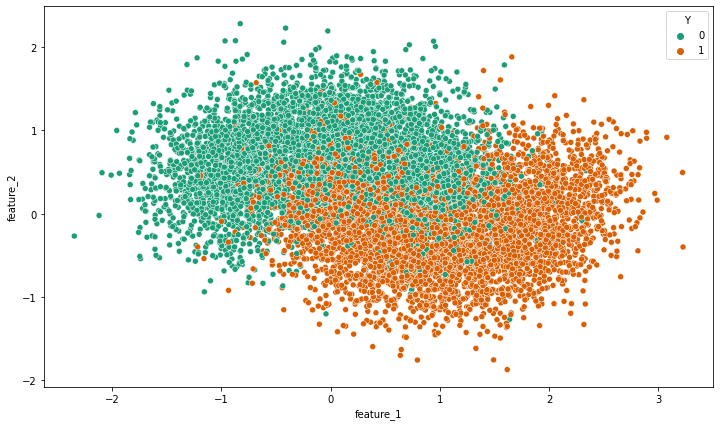

In [99]:
plt.figure(figsize = (12,7))
sns.scatterplot(x = "feature_1", y = "feature_2", hue = "Y", palette = "Dark2", data = df)

### Training

In [100]:
# Spliting dataset in training and testing
X = df.drop(["Y"], axis = 1)
Y = df["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10201)

In [101]:
# Fitting model with GridSearchCV 
params = {"max_leaf_nodes": [5,10,50,100], "max_depth" : [5, 10 , 15, 20]}

gsc = GridSearchCV(estimator = DecisionTreeClassifier(), 
                  param_grid = params, verbose = 3, )

grid_results = gsc.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=5, max_leaf_nodes=5 ...................................
[CV] ....... max_depth=5, max_leaf_nodes=5, score=0.857, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=5 ...................................
[CV] ....... max_depth=5, max_leaf_nodes=5, score=0.841, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=5 ...................................
[CV] ....... max_depth=5, max_leaf_nodes=5, score=0.868, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=5 ...................................
[CV] ....... max_depth=5, max_leaf_nodes=5, score=0.858, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=5 ...................................
[CV] ....... max_depth=5, max_leaf_nodes=5, score=0.848, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10 ..................................
[CV] ...... max_depth=5, max_leaf_nodes=10, score=0.857, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=10 ..................................
[CV] ...... max_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ...... max_depth=5, max_leaf_nodes=50, score=0.854, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=50 ..................................
[CV] ...... max_depth=5, max_leaf_nodes=50, score=0.843, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=50 ..................................
[CV] ...... max_depth=5, max_leaf_nodes=50, score=0.864, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=50 ..................................
[CV] ...... max_depth=5, max_leaf_nodes=50, score=0.845, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=50 ..................................
[CV] ...... max_depth=5, max_leaf_nodes=50, score=0.848, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=100 .................................
[CV] ..... max_depth=5, max_leaf_nodes=100, score=0.854, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=100 .................................
[CV] ..... max_depth=5, max_leaf_nodes=100, score=0.843, total=   0.0s
[CV] max_depth=5, max_leaf_nodes=100 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.5s finished


In [102]:
# Meilleur modèle
print(grid_results.best_params_)

# Training on test set
y_pred = grid_results.predict(X_test)

# Accuracy
print("\n","Accuracy:",accuracy_score(y_pred, y_test))

{'max_depth': 15, 'max_leaf_nodes': 50}

 Accuracy: 0.853


In [103]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_train, y_train)

### Question 8

In [110]:
n_trees = 1000
n_instances = 100
list_data = []

# On crée une liste 
rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for train_index, test_index in rs.split(X_train):
    X_mini_train = X_train.iloc[train_index]
    y_mini_train = y_train.iloc[train_index]
    list_data.append((X_mini_train, y_mini_train))

# On train sur chacun des subdatasets    
tree_model = DecisionTreeClassifier(random_state=12, max_depth = 5, max_leaf_nodes =  5)

score =[]
pred_dic = {}

for i in range(len(list_data)):
    tree_model.fit(list_data[i][0], list_data[i][1])
    y_pred = tree_model.predict(X_test)
    score.append(accuracy_score(y_pred, y_test))
    pred_dic[i] = y_pred
    
# On met les valeurs dans un dataframe
pred_df = pd.DataFrame.from_dict(pred_dic)    

# On calcule le mode par rangée
import statistics
pred_df["mode_pred"] = pred_df.apply(lambda x: statistics.mode(x), axis = 1)

# On calcule le score final
print(accuracy_score(pred_df["mode_pred"], y_test))

0.847
